## 주요절차

### 1. 초기데이터 분석

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형)

유무 확인)차트 재확인 (이

* 기초통계정보 확인

### 2. 데이터 정제

#### 2.1. 원본데이터에서 분석가능한 형태로 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

#### 3.4 데이터 분석 결과도출

# 데이터분석 적용 실습 템플릿

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager,rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 사용

import seaborn as sns
import pandas as pd

import folium
from folium.plugins import MarkerCluster

## 데이터 수집

In [51]:
# 데이터 소스를 확보하세요
df = pd.read_csv('대구도시개발공사_수성알파시티 시설물위치 정보_20230727.csv',encoding='cp949')

## 1. 초기데이터 분석

### 1-1. 데이터스키마 확인

In [52]:
df.columns

Index(['순번', '코드', '시설물명', '위치명', '주소', '등록일', '시설물구분', '운영상태', '위도', '경도'], dtype='object')

#### 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열: A열의 의미를 기술
* B열: B열의 의미를 기술  
...

코드, 시설물명은 시설물구분으로 통일되어 있음.

- 지능형도보안전시스템: 학교주변 횡단보도 등에 바닥신호등 및 과속경보시스템을 구축하여 어린이를 위한 안전하고 편안한 보행환경 제공  
               => (바닥신호등 3개소, 차량과속정보 10개소)  
- 디지털사이니지: 날씨, 시정소식, 행사·관광정보 등 다양한 정보 표출  
               => 55인치 고해상도 스마트 스크린  
- 도로위험 정보제공: 도로 위의 사고, 적치물 낙하 등 돌발상황 정보를 교통정보제공시스템을 통해 제공  
- 불법주정차: 주차, 정차로 인한 교통사고 및 교통체증을 예방하기 위한 CCTV 기반 불법 주정차 단속  
- 스마트 워킹: 수성의료지구 내에 걷기 코스가 조성된 주요지점에 비콘을 부착해  
                 시민들의 이용에 따른 자동 거리 계산, 스마트폰을 활용한 운동량체크,  
                 개인 칼로리 등 계산과 실적누적 포인트 제공으로  
                 간편하고 효과적인 시민 건강을 증진 시스템 입니다.  

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [53]:
df.shape

(132, 10)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      132 non-null    int64  
 1   코드      132 non-null    object 
 2   시설물명    132 non-null    object 
 3   위치명     132 non-null    object 
 4   주소      132 non-null    object 
 5   등록일     132 non-null    object 
 6   시설물구분   132 non-null    object 
 7   운영상태    132 non-null    object 
 8   위도      132 non-null    float64
 9   경도      132 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 10.4+ KB


In [55]:
df.시설물구분.unique()

array(['스마트가로등', '생활안전CCTV', '차량번호인식', '지능형도보안전', '주정차무인관제', '도로위험정보',
       '불법주정차', '디지털사이니지', '미디어월', '전기차충전기', '스마트워킹'], dtype=object)

* 기초통계항목

In [56]:
df.describe()

,순번,위도,경도
count,132.000000,132.000000,132.000000
mean,66.500000,35.836941,128.690199
std,38.249183,0.002219,0.005199
min,1.000000,35.832300,128.679600
25%,33.750000,35.835141,128.687212
50%,66.500000,35.836807,128.690845
75%,99.250000,35.838900,128.694035
max,132.000000,35.841760,128.698056


In [57]:
df.describe(include = object)

,코드,시설물명,위치명,주소,등록일,시설물구분,운영상태
count,132,132,132,132,132,132,132
unique,11,131,131,90,2,11,2
top,SW,스마트워킹-022,ER-001,운동시설,2018-10-21,스마트워킹,정상
freq,41,2,2,18,131,41,125


In [58]:
df.head()

,순번,코드,시설물명,위치명,주소,등록일,시설물구분,운영상태,위도,경도
0,1,SL,스마트가로등-001,SL-001,대구광역시 수성구 시지동 430-1,2018-10-21,스마트가로등,정상,35.84074,128.6921
1,2,SL,스마트가로등-002,SL-002,대구광역시 수성구 시지동 396,2018-10-21,스마트가로등,비정상,35.83937,128.6932
2,3,SL,스마트가로등-003,SL-003,대구광역시 수성구 시지동 450-3,2018-10-21,스마트가로등,정상,35.83935,128.6906
3,4,SL,스마트가로등-004,SL-004,대구광역시 수성구 대흥동 198-1,2018-10-21,스마트가로등,정상,35.83895,128.6892
4,5,SL,스마트가로등-005,SL-005,대구광역시 수성구 노변동 567,2018-10-21,스마트가로등,비정상,35.83705,128.6943


## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [59]:
df_1 = df.drop( columns = ['순번','코드','시설물명','위치명'])
df_1.head()

# 시설물 별 운영상태에 따라 위도 경도 맵에 표시

,주소,등록일,시설물구분,운영상태,위도,경도
0,대구광역시 수성구 시지동 430-1,2018-10-21,스마트가로등,정상,35.84074,128.6921
1,대구광역시 수성구 시지동 396,2018-10-21,스마트가로등,비정상,35.83937,128.6932
2,대구광역시 수성구 시지동 450-3,2018-10-21,스마트가로등,정상,35.83935,128.6906
3,대구광역시 수성구 대흥동 198-1,2018-10-21,스마트가로등,정상,35.83895,128.6892
4,대구광역시 수성구 노변동 567,2018-10-21,스마트가로등,비정상,35.83705,128.6943


In [60]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환 등)

In [61]:
df_1['동'] = df_1.주소.str.split().str[-2]
df_1

,주소,등록일,시설물구분,운영상태,위도,경도,동
0,대구광역시 수성구 시지동 430-1,2018-10-21,스마트가로등,정상,35.840740,128.692100,시지동
1,대구광역시 수성구 시지동 396,2018-10-21,스마트가로등,비정상,35.839370,128.693200,시지동
2,대구광역시 수성구 시지동 450-3,2018-10-21,스마트가로등,정상,35.839350,128.690600,시지동
3,대구광역시 수성구 대흥동 198-1,2018-10-21,스마트가로등,정상,35.838950,128.689200,대흥동
4,대구광역시 수성구 노변동 567,2018-10-21,스마트가로등,비정상,35.837050,128.694300,노변동
...,...,...,...,...,...,...,...
127,운동시설,2018-10-21,스마트워킹,정상,35.833676,128.690031,NaN
128,사이니지,2018-10-21,스마트워킹,정상,35.834599,128.686274,NaN
129,플랫폼센터,2018-10-21,스마트워킹,정상,35.835525,128.681771,NaN
130,카페도담도담,2018-10-21,스마트워킹,정상,35.835492,128.681356,NaN


### 2-2. 데이터 클리닝

In [62]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [63]:
missing_values = df_1.isnull().any()
column_missing_values = missing_values[ missing_values == True ]
column_missing_values

동    True
dtype: bool

In [64]:
df[df.isnull().any(axis=1)]

,순번,코드,시설물명,위치명,주소,등록일,시설물구분,운영상태,위도,경도


* 결측치 보정

In [65]:
# df['나이'] = df['나이'].fillna(0)

In [66]:
# df = df.fillna(0)

In [75]:
df_1[df_1.동.isnull()] #결측치 존재 - 기타로 변경
df_1.동[(df_1['시설물구분'] == '전기차충전기')] = '대흥동' #위치 상 대흥동에 존재

In [76]:
df[df_1.동.fillna('기타',inplace=True)] 

KeyError: None

In [ ]:
df_1.동.unique()

* 중복값 삭제 (필요시)

In [ ]:
df[df.duplicated(keep=False)]

In [ ]:
df.drop_duplicates(inplace=True)

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
  (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)
* 시각화한 차트에 대한 분석

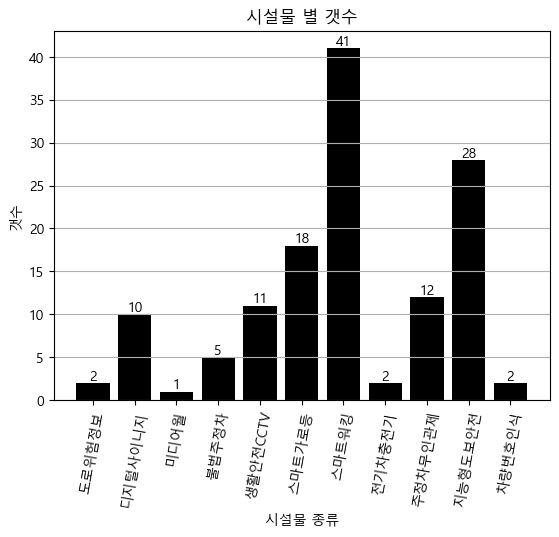

In [77]:
df_1['시설물구분'].value_counts()

value_counts = df_1['시설물구분'].value_counts().sort_index()
value_counts

# 막대 그래프 그리기
facility_counts = value_counts.index.tolist()
values = value_counts.values

x = np.arange(len(facility_counts))

bars = plt.bar(x, values, width=0.8, color = 'k',align = 'center',linewidth = 2)
plt.bar_label(bars, fmt='%d', label_type='edge')
plt.xticks(x, facility_counts)
plt.xlabel('시설물 종류')
plt.ylabel('갯수')
plt.title('시설물 별 갯수', loc = 'center')
plt.grid(True,axis = 'y')
plt.xticks(rotation=80) 

plt.show()

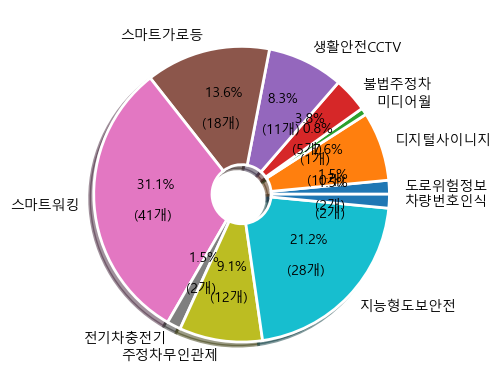

In [78]:
facility_counts = facility_counts
# explode = [0.1, 0.1, 0.1,0.1,0.1,0.1]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(values, labels=facility_counts,autopct=lambda pct: f"{pct: .1f}%\n\n({int(pct/100.*np.sum(values))}개)",wedgeprops=wedgeprops, shadow=True)

# autopct: % 포맷 문자열의 시작을 명시, .1f: 소스점 첫째자리까지 표기, %%: %기호를 표기
plt.show()

In [73]:
# 대구 디지털혁신진흥원 위도, 경도
# 위도(Latitude) : 35.835303 / 경도(Longitude) : 128.6815665

map_dip = folium.Map(location=[35.835303, 128.6815665],
               zoom_start=15, 
               width=800, 
               height=550
              )

coords = df_1[['위도','경도']]
marker_cluster = MarkerCluster().add_to(map_dip)

for name, lat, long, monitoring  in zip(df_1['시설물구분'],df_1['위도'],df_1['경도'],df_1['운영상태']):
    folium.Marker([lat, long],
                  popup=monitoring,
                  tooltip=name,
                  icon = folium.Icon(color="green")).add_to(marker_cluster)
map_dip

### 데이터 시각화

### 각 동 별 시설물

In [ ]:
df_filtered = df_1[df_1['동'] != '기타']

sns.histplot(data = df_filtered, x = '동', hue = '시설물구분')

plt.show()
    

##### 각 동별 시설물 갯수를 보면, 대흥동에서 제일 많고 그다음 노변동, 시지동 순으로 많은 것을 볼 수 있다.

##### 현재 알파시티의 중심지구는 대흥동이라고 생각된다. 

### 시설물 별 갯수

In [ ]:
df_1['시설물구분'].value_counts()

value_counts = df_1['시설물구분'].value_counts().sort_index()
value_counts

# 막대 그래프 그리기
facility_counts = value_counts.index.tolist()
values = value_counts.values

x = np.arange(len(facility_counts))

bars = plt.bar(x, values, width=0.8, color = 'k',align = 'center',linewidth = 2)
plt.bar_label(bars, fmt='%d', label_type='edge')
plt.xticks(x, facility_counts)
plt.xlabel('시설물 종류')
plt.ylabel('갯수')
plt.title('시설물 별 갯수', loc = 'center')
plt.grid(True,axis = 'y')
plt.xticks(rotation=80) 

plt.show()

### 시설물 별 비율

In [ ]:
facility_counts = facility_counts
# explode = [0.1, 0.1, 0.1,0.1,0.1,0.1]
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(values, labels=facility_counts,autopct=lambda pct: f"{pct: .1f}",wedgeprops=wedgeprops, shadow=True)

# autopct: % 포맷 문자열의 시작을 명시, .1f: 소스점 첫째자리까지 표기, %%: %기호를 표기
plt.show()

### 각 시설물 별 위치  
가로등 - 파란색  
CCTV - 붉은색  
스마트워킹 - 검은색  

In [ ]:
# 대구 디지털혁신진흥원 위도, 경도
# 위도(Latitude) : 35.835303 / 경도(Longitude) : 128.6815665

map_dip = folium.Map(location=[35.835303, 128.6815665],
               zoom_start=15, 
               width=800, 
               height=550
              )

coords = df_1[['위도','경도']]
marker_cluster = MarkerCluster().add_to(map_dip)

for name, lat, long, monitoring  in zip(df_1['시설물구분'],df_1['위도'],df_1['경도'],df_1['운영상태']):
    if name == '스마트가로등':
        icon = folium.Icon(color="blue")
    elif name == '생활안전CCTV':
        icon = folium.Icon(color="red")
    elif name == '스마트워킹':
        icon = folium.Icon(color="black")
    else:
        icon = folium.Icon(color="green")
    
    folium.Marker([lat, long],
                  popup=monitoring,
                  tooltip=name,
                  icon = icon
                 ).add_to(marker_cluster)
                  
map_dip

### 비정상 상태의 시설물(빨간색)

In [70]:
# 대구 디지털혁신진흥원 위도, 경도
# 위도(Latitude) : 35.835303 / 경도(Longitude) : 128.6815665

map_dip = folium.Map(location=[35.835303, 128.6815665],
               zoom_start=15, 
               width=800, 
               height=550
              )

coords = df_1[['위도','경도']]

for name, lat, long, monitoring  in zip(df_1['시설물구분'],df_1['위도'],df_1['경도'],df_1['운영상태']):
    if monitoring == '비정상':
        icon = folium.Icon(color="red")
    else:
        icon = folium.Icon(color="green")
    
    folium.Marker([lat, long],
                  popup=monitoring,
                  tooltip=name,
                  icon = icon
                 ).add_to(map_dip)
                  
map_dip

### 스마트워킹의 위치정보

In [69]:
# 대구 디지털혁신진흥원 위도, 경도
# 위도(Latitude) : 35.835303 / 경도(Longitude) : 128.6815665

map_dip = folium.Map(location=[35.835303, 128.6815665],
               zoom_start=15, 
               width=800, 
               height=550
              )

coords = df_1[['위도','경도']]

for name, lat, long, monitoring  in zip(df_1['시설물구분'],df_1['위도'],df_1['경도'],df_1['운영상태']):
    if name == '스마트워킹':
        icon = folium.Icon(color="black")
  
        folium.Marker([lat, long],
                      popup=monitoring,
                      tooltip=name,
                      icon = icon
                 ).add_to(map_dip)
                  
map_dip

* 수성알파시티 스마트시티 조성사업은 1단계 기반구축(플랫폼 및 13개 서비스)과 2단계 대구스마트시티센터 건립으로 나뉩니다.
* 1단계 기반구축으로  
교통(5):    자율주행, 지능형도보안전시스템, 교통정보제공, 도로위험 정보제공, 불법주정차단속CCTV
에너지(1):  전기차 충전기
생활편익(3):    스마트미디어월, 디지털사이니지, 스마트워킹서비스
안전(3):     스마트가로등, 생활안전CCTV, 차량번호인식CCTV
기반시설관리(1): 지하매설물 관리시스템
가 있습니다. 
* 1단계 사업의 결과로 세워진 시설물들을 분석해 보았습니다. 자율주행, 지하매설물 관리시스템은 빠진 11개 시설물에 대한 정보입니다.
    - 지능형도보안전시스템: 학교주변 횡단보도 등에 바닥신호등 및 과속경보시스템을 구축하여 어린이를 위한 안전하고 편안한 보행환경 제공
                   => (바닥신호등 3개소, 차량과속정보 10개소)
    - 디지털사이니지: 날씨, 시정소식, 행사·관광정보 등 다양한 정보 표출
               => 55인치 고해상도 스마트 스크린
    - 도로위험 정보제공: 도로 위의 사고, 적치물 낙하 등 돌발상황 정보를 교통정보제공시스템을 통해 제공
    - 불법주정차: 주차, 정차로 인한 교통사고 및 교통체증을 예방하기 위한 CCTV 기반 불법 주정차 단속
    - 스마트 워킹: 수성의료지구 내에 걷기 코스가 조성된 주요지점에 비콘을 부착해
                 시민들의 이용에 따른 자동 거리 계산, 스마트폰을 활용한 운동량체크,
                 개인 칼로리 등 계산과 실적누적 포인트 제공으로
                 간편하고 효과적인 시민 건강을 증진 시스템 입니다.
[출처] 대구 수성알파시티 스마트서비스 - Smart Living (스마트워킹)|작성자 대구 스마트도시

### 3.4 최종 데이터 분석 결과도출

* 데이터 분석을 통해 얻은 새로운 지식, 인사이트를 정리하세요.
* 새로운 지식 및 인사이트 별 비즈니스 전략을 도출할 수 있으면 정리해 보세요

먼저 각 동별 시설물 갯수를 보면, 대흥동에서 제일 많고 그다음 노변동, 시지동 순으로 많은 것을 볼 수 있는데, 이를 보아 현재 알파시티의 중심지구는 대흥동이라고 생각된다.

비정상 상태가 가장 많은 시설물은 스마트 가로등이며, 그다음은 스마트워킹이다. 가로등은 전체 18개 중 3개가 비정상 상태이고, 스마트워킹은 41개 중 2개가 비정상 상태이다.

비정상율은 스마트 가로등이 높다.
=> 스마트 가로등의 유지보수 비용이 높을 것.

가장 많은 시설물은 스마트워킹이다.
=> 스마트워킹은 시민 건강을 증진하기 위한 시스템이기 때문에, 알파시티의 첫 취지(의료지구)에 따른 것인 듯 하다.

비즈니스 전략

스마트 워킹의 비콘은 공원주변, 아파트 근처 등에서 사람들이 이용할 수 있고, 그에 따라 실적누적 포인트를 제공하는데, 이 포인트로 주변 카페를 이용할 수 있게 하면, 시민 건강증진 등에 도움이 될 수 있다.